## 로지스틱 회귀

### 시그모이드 함수
- 데이터를 0~1사이 배치시키는 확률을 위한 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc = {'axes.unicode_minus':False})

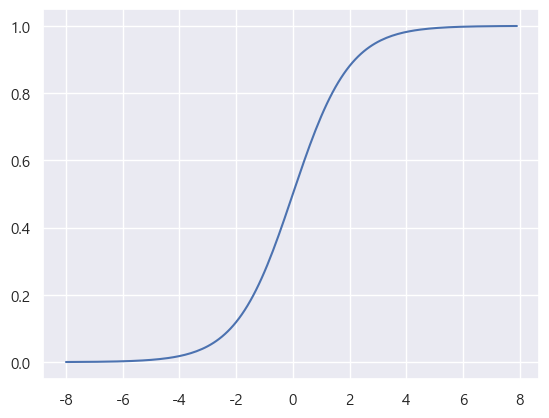

In [2]:
# 시그모이드 함수 그리기

z = np.arange(-8,8,0.1)
sigmoid = 1 / (1+np.exp(-z))
plt.plot(z,sigmoid)

- 클래스 : 분류되는 아이템
    - 양성 클래스 : 0.5보다 큼
    - 음성 클래스 : 0.5보다 작음

### 로지스틱 회귀 이진 분류

- 기준데이터 : https://bit.ly/fish_csv_data
- Pandas로 데이터 로드
- Numpy는 문자열은 처리안됨.

In [3]:
import pandas as pd

In [4]:
# 데이터 로드
fish = pd.read_csv('./fish.csv', encoding = 'utf-8')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


- Species(종), Weight(무게), Length(길이) , Diagonal(대각선길이), Height(높이), Width(두께)
- 어종 분류
    - Bream - 도미
    - Roach - 잉어
    - 

In [5]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input

In [ ]:
fish_target = fish['Species'].to_numpy()
fish_target

In [10]:
# 훈련세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split (
    fish_input, fish_target, random_state=42
)

In [ ]:
train_input

- 특성이 전부 단위 달라서 무게가 가장 영향이 크게됨
- 모든 특성데이터를 -2~ 2사이로 재배치
- 직접 평균으로 빼고, 표준편차로 나눌 것이 아니면 StandardScaler를 사용할 것

In [14]:
# 표준 정규화(Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(train_input)

StandardScaler()

In [17]:
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)


#### 이진분류 수행
- Bream(도미)와 Smelt(빙어)만 분리

In [26]:
breaem_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
breaem_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [27]:
train_scaled_bream_smelt = train_scaled[breaem_smelt_indexes]
train_target_bream_smelt = train_target[breaem_smelt_indexes]

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [30]:
lr.fit(train_scaled_bream_smelt,train_target_bream_smelt)
lr.score(train_scaled_bream_smelt,train_target_bream_smelt)

1.0

In [31]:
lr.predict(train_scaled_bream_smelt[5:11])

array(['Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [32]:
# 계수 (기울기/가중치), 절편 구하기
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 이진분류 로지스틱 회귀 방정식
    - z = -0.40451732 x 무게 - 0.57582787 x 길이 - 0.66248158 x 대각선길이 - 1.01329614 x 높이 - 0.73123131 x 두께 -2.16172774

In [33]:
# z값 -> lr.decision_function() 사용
decisions = lr.decision_function(train_scaled_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

- 시그모이드 함수에 통과시켜 확률 구함
- Scipy - Numpy와 유사한 과학 라이브러리
    - expit() 

### 로지스틱 회귀 다중 분류

- 데이터가 모두 들어있는 train_scaled, train_target을 사용
- 규제 사용 : 과대적합 또는 과소적합을 막기위해서 추가하는 하이퍼파라미터

In [ ]:
# 규제 C = 20 (기본값:1)
# 반복횟수 max_iter = 1000 번
lr2 = LogisticRegression(C=20, max_iter=1000)

소프트맥스 함수 사용

In [37]:
decision = lr.decision_function(test_scaled[:5])

In [38]:
from scipy.special import softmax